# Twitter Hate Speech - Data Analysis

## "Import libraries and load dataset"

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Load the dataset
df = pd.read_csv("/Users/anveshams/Downloads/labeled_data.csv")

## Step 1: Data Exploration

In [128]:

print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nFirst 5 Rows:\n", df.head())

Dataset Shape: (24783, 11)

Column Names:
 Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet', 'word_count', 'char_count', 'sentiment_polarity',
       'sentiment_subjectivity'],
      dtype='object')

First 5 Rows:
    Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  word_count  char_count  \
0  !!! RT @mayasolovely: As a woman you shouldn't...          25         140   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...          16          85   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby... 

## Step 2: Data Cleaning & Preprocessing

In [11]:

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.strip()  # Remove extra spaces
    return text

df['clean_tweet'] = df['tweet'].apply(clean_text)

## Step 3: Exploratory Data Analysis (EDA)

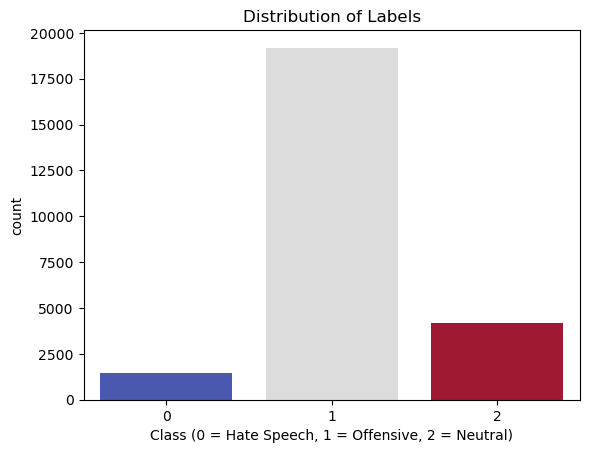

In [15]:

sns.countplot(x=df['class'], hue=df['class'], palette='coolwarm', legend=False)
plt.title("Distribution of Labels")
plt.xlabel("Class (0 = Hate Speech, 1 = Offensive, 2 = Neutral)")
plt.show()

In [19]:
# Corporate Metrics
df['word_count'] = df['clean_tweet'].apply(lambda x: len(x.split()))
print("Average Words per Tweet:", df['word_count'].mean())
print("Hate Speech Percentage:", df[df['class'] == 0].shape[0] / df.shape[0] * 100, "%")
print("Offensive Speech Percentage:", df[df['class'] == 1].shape[0] / df.shape[0] * 100, "%")

Average Words per Tweet: 13.627890085946012
Hate Speech Percentage: 5.770084332001776 %
Offensive Speech Percentage: 77.43211072105879 %


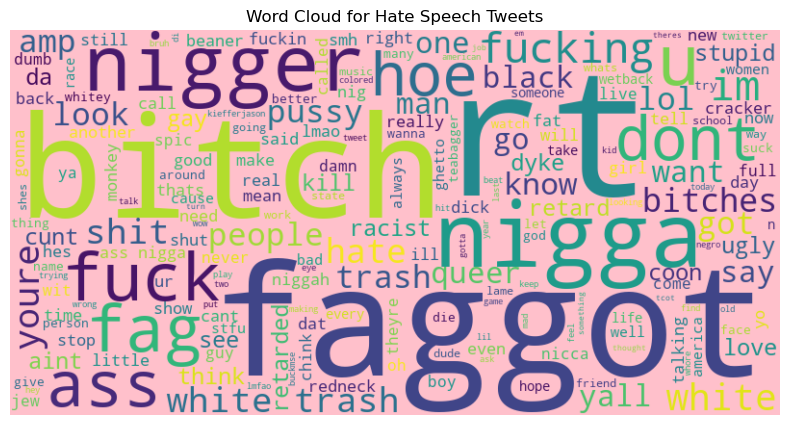

In [36]:
# Word Cloud for Hate Speech
hate_speech = ' '.join(df[df['class'] == 0]['clean_tweet'])
hate_wordcloud = WordCloud(width=800, height=400, background_color='pink').generate(hate_speech)
plt.figure(figsize=(10, 5))
plt.imshow(hate_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Hate Speech Tweets")
plt.show()

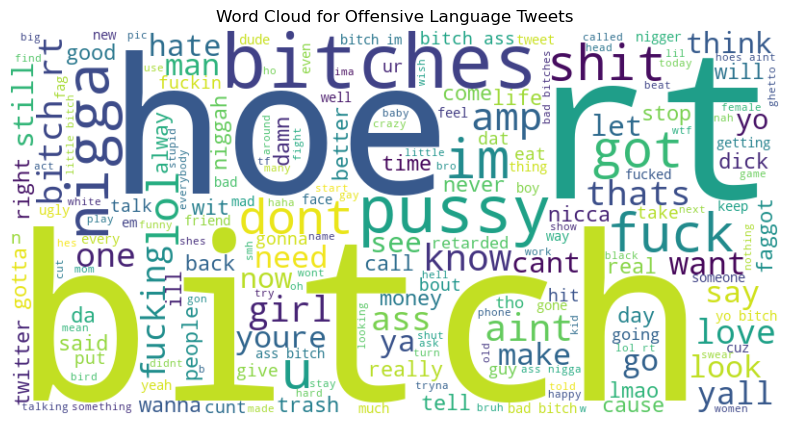

In [34]:
# Word Cloud for Offensive Language
offensive_speech = ' '.join(df[df['class'] == 1]['clean_tweet'])
offensive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(offensive_speech)
plt.figure(figsize=(10, 5))
plt.imshow(offensive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Offensive Language Tweets")
plt.show()

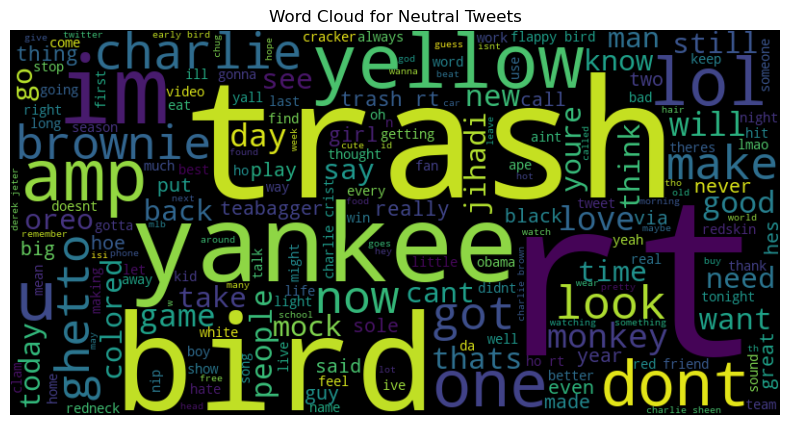

In [27]:
# Word Cloud for Neutral Content
neutral_speech = ' '.join(df[df['class'] == 2]['clean_tweet'])
neutral_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(neutral_speech)
plt.figure(figsize=(10, 5))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Neutral Tweets")
plt.show()

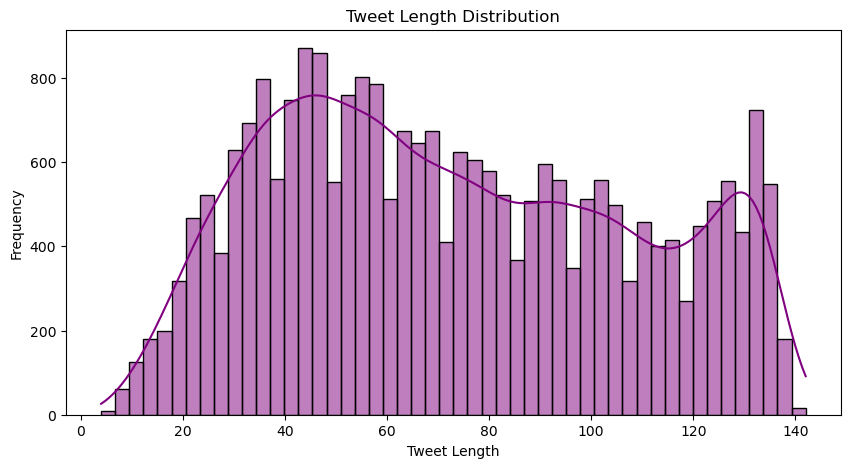

In [38]:
# Length of Tweets Distribution
plt.figure(figsize=(10, 5))
df['tweet_length'] = df['clean_tweet'].apply(len)
sns.histplot(df['tweet_length'], bins=50, kde=True, color='purple')
plt.title("Tweet Length Distribution")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()

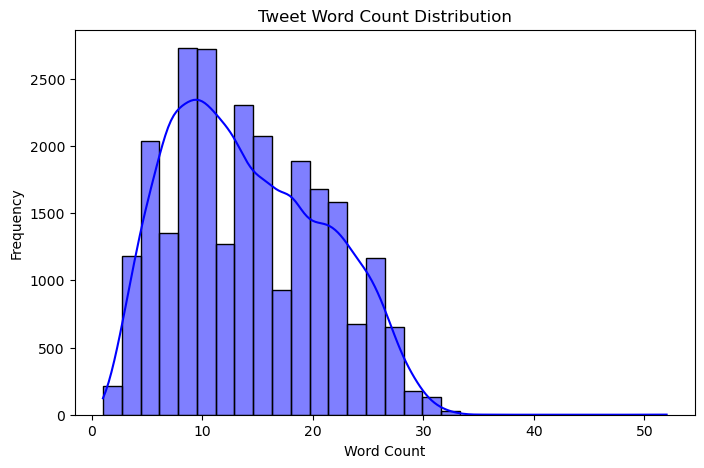

In [58]:
# Word Count Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
plt.title("Tweet Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

/var/folders/f6/4yrn_tq10ws5cypwl6z97bv00000gn/T/ipykernel_1293/652584050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['class'], y=df['char_count'], palette=['red', 'orange', 'green'])


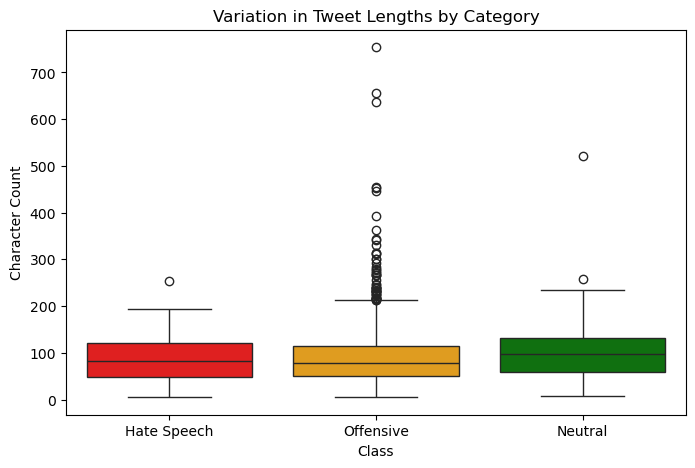

In [60]:
# Boxplot to show variation in tweet lengths across categories
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['class'], y=df['char_count'], palette=['red', 'orange', 'green'])
plt.xticks(ticks=[0, 1, 2], labels=["Hate Speech", "Offensive", "Neutral"])
plt.title("Variation in Tweet Lengths by Category")
plt.xlabel("Class")
plt.ylabel("Character Count")
plt.show()

## Step 4: Feature Engineering

In [40]:

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['clean_tweet'])
y = df['class']

In [42]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 5: Model Building

In [44]:


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


In [46]:
# Evaluate Model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.893483962073835
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.16      0.24       290
           1       0.91      0.96      0.94      3832
           2       0.84      0.83      0.83       835

    accuracy                           0.89      4957
   macro avg       0.76      0.65      0.67      4957
weighted avg       0.88      0.89      0.88      4957



In [48]:
# Using Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.839822473270123
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.01      0.01       290
           1       0.84      0.99      0.91      3832
           2       0.88      0.44      0.59       835

    accuracy                           0.84      4957
   macro avg       0.74      0.48      0.50      4957
weighted avg       0.82      0.84      0.80      4957



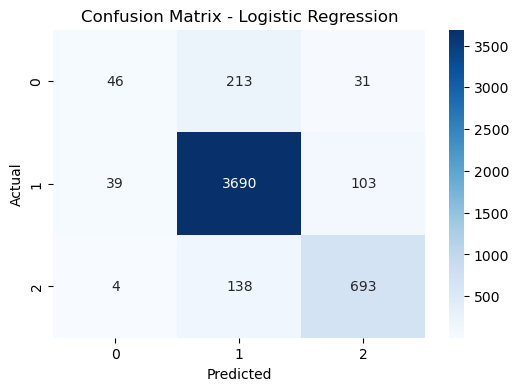

In [50]:
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

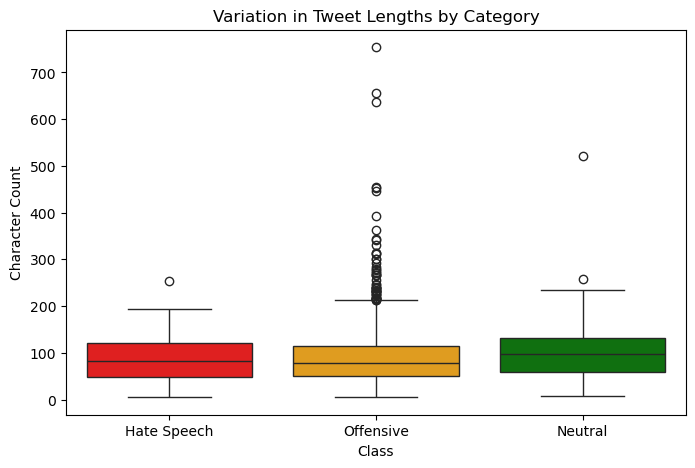

In [98]:

# Boxplot to show variation in tweet lengths across categories
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['class'], y=df['char_count'], hue=df['class'], palette=['red', 'orange', 'green'], legend=False)
plt.xticks(ticks=[0, 1, 2], labels=["Hate Speech", "Offensive", "Neutral"])
plt.title("Variation in Tweet Lengths by Category")
plt.xlabel("Class")
plt.ylabel("Character Count")
plt.show()

In [62]:
# Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, shapiro, f_oneway, kruskal, chi2_contingency, pearsonr, spearmanr, ttest_ind
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

# Load the dataset
df = pd.read_csv("/Users/anveshams/Downloads/labeled_data.csv")

# Ensure tweet column is a string
df['tweet'] = df['tweet'].astype(str)
df['word_count'] = df['tweet'].apply(lambda x: len(x.split()))
df['char_count'] = df['tweet'].apply(len)

# ======================== 1️⃣ Data Integrity Checks ========================

# Missing Values
missing_values = df.isnull().sum()

# Duplicates
duplicate_rows = df.duplicated().sum()

# Data Types
data_types = df.dtypes

# ======================== 2️⃣ Distribution Tests ========================

# Kolmogorov-Smirnov Test for Normality (Word Count)
ks_test = ks_2samp(df['word_count'], np.random.normal(df['word_count'].mean(), df['word_count'].std(), len(df)))

# Shapiro-Wilk Test (Normality Check)
shapiro_test = shapiro(df['word_count'].sample(500, random_state=42))  # Using a sample as Shapiro is sensitive to large data

# ======================== 3️⃣ Comparing Different Classes ========================

# ANOVA: Comparing mean word count across classes
anova_test = f_oneway(df[df['class'] == 0]['word_count'], 
                      df[df['class'] == 1]['word_count'], 
                      df[df['class'] == 2]['word_count'])

# Kruskal-Wallis Test: Non-parametric ANOVA alternative
kruskal_test = kruskal(df[df['class'] == 0]['word_count'], 
                       df[df['class'] == 1]['word_count'], 
                       df[df['class'] == 2]['word_count'])

# Chi-Square Test: Class distribution significance
contingency_table = df['class'].value_counts().to_frame()
chi_square_test = chi2_contingency(contingency_table)

# ======================== 4️⃣ Correlation Analysis ========================

# Pearson Correlation: Relationship between Word Count and Character Count
pearson_corr = pearsonr(df['word_count'], df['char_count'])

# Spearman Rank Correlation: Non-parametric alternative for skewed data
spearman_corr = spearmanr(df['word_count'], df['char_count'])

# T-Test: Difference in word count between Hate Speech and Neutral
t_test_hate_vs_neutral = ttest_ind(df[df['class'] == 0]['word_count'], 
                                   df[df['class'] == 2]['word_count'])

# ======================== 5️⃣ Sentiment & Lexical Analysis ========================

# Sentiment Analysis using TextBlob
df['sentiment_polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# TF-IDF Analysis: Extracting Important Words
vectorizer = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = vectorizer.fit_transform(df['tweet'])
important_words = vectorizer.get_feature_names_out()
# ======================== Results Display ========================
# Print Data Integrity Checks
results = {
    "Missing Values": missing_values.to_dict(),
    "Duplicate Rows": duplicate_rows,
    "Data Types": data_types.to_dict(),
    "KS Test": ks_test,
    "Shapiro-Wilk Test": shapiro_test,
    "ANOVA Test": anova_test,
    "Kruskal-Wallis Test": kruskal_test,
    "Chi-Square Test": chi_square_test,
    "Pearson Correlation": pearson_corr,
    "Spearman Correlation": spearman_corr,
    "T-Test (Hate Speech vs Neutral)": t_test_hate_vs_neutral,
    "Top TF-IDF Words": important_words.tolist()
}

results


## Tests and Analysis 

In [96]:
# Displaying results in a structured format

# Function to format statistical test results
def format_test_result(test_name, result):
    if isinstance(result, tuple):
        return f"**{test_name}**:\nStatistic = {result[0]:.4f}, p-value = {result[1]:.4f}\n"
    return f"**{test_name}**:\n{result}\n"

# Print Data Integrity Checks
output = ""

output += "🔍 Data Integrity Checks:\n"
output += f"- Missing Values:\n{missing_values.to_string()}\n\n"
output += f"- Duplicate Rows: {duplicate_rows}\n\n"
output += f"- Data Types:\n{data_types.to_string()}\n\n"

# Print Distribution Tests
output += "📊 Distribution Tests:\n"
output += format_test_result("Kolmogorov-Smirnov Test", ks_test)
output += format_test_result("Shapiro-Wilk Test", shapiro_test)

# Print Comparison Tests
output += "📈 Comparing Different Classes:\n"
output += format_test_result("ANOVA Test (Word Count across classes)", anova_test)
output += format_test_result("Kruskal-Wallis Test", kruskal_test)
output += format_test_result("Chi-Square Test (Class Distribution)", chi_square_test)

# Print Correlation Analysis
output += "**📉 Correlation Analysis:**\n"
output += format_test_result("Pearson Correlation (Word Count vs Char Count)", pearson_corr)
output += format_test_result("Spearman Rank Correlation", spearman_corr)
output += format_test_result("T-Test (Hate Speech vs Neutral)", t_test_hate_vs_neutral)

# Print Sentiment & Lexical Analysis
output += "**💬 Sentiment & Lexical Analysis:**\n"
output += f"- **Top 20 TF-IDF Words:** {', '.join(important_words)}\n\n"

# Print final output
print(output)



🔍 Data Integrity Checks:
- Missing Values:
Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
word_count            0
char_count            0

- Duplicate Rows: 0

- Data Types:
Unnamed: 0             int64
count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
word_count             int64
char_count             int64

📊 Distribution Tests:
**Kolmogorov-Smirnov Test**:
Statistic = 0.0905, p-value = 0.0000
**Shapiro-Wilk Test**:
Statistic = 0.9595, p-value = 0.0000
📈 Comparing Different Classes:
**ANOVA Test (Word Count across classes)**:
Statistic = 34.6954, p-value = 0.0000
**Kruskal-Wallis Test**:
Statistic = 78.3319, p-value = 0.0000
**Chi-Square Test (Class Distribution)**:
Statistic = 0.0000, p-value = 1.0000
**📉 Correlation Analysis:**
**Pearson Co